* t-SNE known as t- Distributed Stochastic Neighbor Embedding for dimension reduction.
* Dimension reduction What is it?, An Example, Using NLP Let's we process text corpa and we do vecorization of corpa using either Countvectorizer or TF-IDF vectorizer, to convert words into feature space, Usually,This feature space are very large number(i.e. large number of words/columns). To bring this into 2-D or 3-D here this technique come in handy. I will leave to you to explore more about dimension reduction techniques and maths behind dimension reduction.

* Few Examples on Dimension reduction

### Example I

In [1]:
# import Tensorflow and Numpy
import tensorflow as tf
import numpy as np

In [2]:
corpus_raw = 'king. He is the king . The king is royal . She is the royal  queen '

In [3]:
# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [4]:
print(words)
print(word2int)
print(int2word)

{'king.', 'queen', 'she', 'royal', 'king', 'is', 'he', 'the'}
{'king.': 0, 'queen': 1, 'she': 2, 'royal': 3, 'king': 4, 'is': 5, 'he': 6, 'the': 7}
{0: 'king.', 1: 'queen', 2: 'she', 3: 'royal', 4: 'king', 5: 'is', 6: 'he', 7: 'the'}


In [5]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [6]:
sentences

[['king'],
 ['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [7]:
WINDOW_SIZE = 2

In [8]:
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        #print(word_index,word)
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            #print(nb_word)
            if nb_word != word:
                data.append([word, nb_word])

In [9]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [9]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [10]:
vocab_size

8

* Placeholders

In [11]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

In [12]:
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [13]:
print(x_train)
print(y_train)

[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]


In [14]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

### Tensorflow Graph

In [15]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM])) # Embedding
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x, W1), b1)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

* Run Tensoflow Session

In [17]:
#make sure you do this!
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

In [18]:
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

In [19]:
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy_loss)

Instructions for updating:
Use tf.cast instead.


In [20]:
n_iters = 1000

# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  3.4633532
loss is :  3.4186604
loss is :  3.3764892
loss is :  3.3367507
loss is :  3.299346
loss is :  3.2641659
loss is :  3.2310944
loss is :  3.2000117
loss is :  3.1707962
loss is :  3.1433268
loss is :  3.1174839
loss is :  3.0931528
loss is :  3.0702224
loss is :  3.048587
loss is :  3.028149
loss is :  3.008814
loss is :  2.9904964
loss is :  2.973116
loss is :  2.9566
loss is :  2.9408786
loss is :  2.9258914
loss is :  2.911581
loss is :  2.8978946
loss is :  2.884786
loss is :  2.8722095
loss is :  2.860128
loss is :  2.8485036
loss is :  2.8373044
loss is :  2.8264992
loss is :  2.8160613
loss is :  2.8059654
loss is :  2.7961884
loss is :  2.786709
loss is :  2.7775083
loss is :  2.768568
loss is :  2.759873
loss is :  2.7514067
loss is :  2.7431562
loss is :  2.7351089
loss is :  2.7272525
loss is :  2.7195766
loss is :  2.7120717
loss is :  2.7047274
loss is :  2.6975355
loss is :  2.6904883
loss is :  2.6835783
loss is :  2.676798
loss is :  2.6701422
loss is

loss is :  1.6715748
loss is :  1.6709188
loss is :  1.6702667
loss is :  1.6696188
loss is :  1.6689751
loss is :  1.6683356
loss is :  1.6676996
loss is :  1.6670679
loss is :  1.6664401
loss is :  1.6658161
loss is :  1.665196
loss is :  1.6645796
loss is :  1.663967
loss is :  1.663358
loss is :  1.662753
loss is :  1.6621513
loss is :  1.6615533
loss is :  1.6609588
loss is :  1.6603678
loss is :  1.6597804
loss is :  1.6591963
loss is :  1.6586157
loss is :  1.6580383
loss is :  1.6574643
loss is :  1.6568937
loss is :  1.6563263
loss is :  1.655762
loss is :  1.6552008
loss is :  1.6546429
loss is :  1.654088
loss is :  1.6535362
loss is :  1.6529875
loss is :  1.6524419
loss is :  1.6518991
loss is :  1.6513592
loss is :  1.6508223
loss is :  1.6502881
loss is :  1.6497568
loss is :  1.6492283
loss is :  1.6487027
loss is :  1.6481798
loss is :  1.6476598
loss is :  1.6471419
loss is :  1.6466272
loss is :  1.6461147
loss is :  1.6456051
loss is :  1.6450981
loss is :  1.644593

loss is :  1.5230875
loss is :  1.5229193
loss is :  1.5227513
loss is :  1.5225838
loss is :  1.5224164
loss is :  1.5222495
loss is :  1.5220824
loss is :  1.5219162
loss is :  1.5217499
loss is :  1.521584
loss is :  1.5214185
loss is :  1.521253
loss is :  1.5210881
loss is :  1.5209234
loss is :  1.5207589
loss is :  1.5205946
loss is :  1.5204309
loss is :  1.5202672
loss is :  1.5201039
loss is :  1.5199409
loss is :  1.5197781
loss is :  1.5196157
loss is :  1.5194534
loss is :  1.5192915
loss is :  1.5191299
loss is :  1.5189685
loss is :  1.5188074
loss is :  1.5186465
loss is :  1.5184859
loss is :  1.5183257
loss is :  1.5181656
loss is :  1.5180058
loss is :  1.5178463
loss is :  1.5176873
loss is :  1.5175283
loss is :  1.5173695
loss is :  1.5172112
loss is :  1.517053
loss is :  1.5168953
loss is :  1.5167376
loss is :  1.5165802
loss is :  1.5164232
loss is :  1.5162665
loss is :  1.5161098
loss is :  1.5159538
loss is :  1.5157976


In [21]:
vectors = sess.run(W1 + b1)

In [22]:
vectors.shape

(8, 5)

In [23]:
vectors

array([[ 0.03858566, -2.818101  ,  2.5346894 ,  0.86590457,  0.76701087],
       [ 1.1270692 ,  1.0639219 ,  2.671502  ,  1.0278306 , -0.04146618],
       [-1.1114675 , -1.337134  ,  2.6089437 ,  1.4320363 , -2.1856148 ],
       [-1.8834751 , -1.2093277 ,  2.0972528 ,  3.244616  , -1.4914255 ],
       [-0.8105009 , -0.4053041 ,  2.2021155 ,  0.2340743 , -0.21584159],
       [ 0.01119256, -1.5985925 ,  2.816031  ,  1.821766  , -1.8548124 ],
       [-0.8927945 , -3.150248  ,  2.6699474 , -0.54789126, -2.267195  ],
       [ 0.38630384,  0.01898694,  0.09588432, -0.66732097, -0.4644513 ]],
      dtype=float32)

In [ ]:
# def euclidean_dist(vec1, vec2):
#     return np.sqrt(np.sum((vec1-vec2)**2))

# def find_closest(word_index, vectors):
#     min_dist = 10000 # to act like positive infinity
#     min_index = -1
#     query_vector = vectors[word_index]
#     for index, vector in enumerate(vectors):
#         if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
#             min_dist = euclidean_dist(vector, query_vector)
#             min_index = index
#     return min_index

In [24]:
# t-SNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

vectors = model.fit_transform(vectors) 

In [25]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[-0.32764003 -0.94480264]
 [-0.5155788  -0.8568421 ]
 [ 0.77282786  0.6346157 ]
 [-0.90836805  0.41817167]
 [-0.746742   -0.6651138 ]
 [-0.97995895 -0.19919932]
 [ 0.18610042 -0.9825308 ]
 [ 0.7051604  -0.7090478 ]]


In [26]:
vectors[word2int[word]][1]

-0.8568421

{'king.', 'queen', 'she', 'royal', 'king', 'is', 'he', 'the'} 



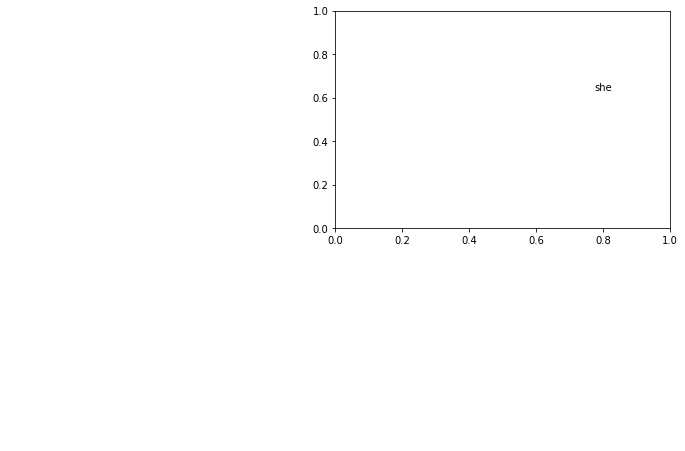

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

print(words,"\n")

fig, ax = plt.subplots()
for word in words:
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

### Example II

In [30]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# we only want to keep the body of the documents!
remove = ('headers', 'footers', 'quotes')

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset="train", categories=categories,remove=remove)
newsgroups_test = fetch_20newsgroups(subset="test", categories=categories,remove=remove)

# only keep letters & make them all lower case
news = [' '.join(filter(str.isalpha, raw.lower().split())) for raw in newsgroups_train.data + newsgroups_test.data]
newsgroups = [' '.join(filter(str.isalpha, raw.lower().split())) for raw in newsgroups_train.data]

In [31]:
print(len(news))
print(type(news))

3387
<class 'list'>


In [32]:
print(len(newsgroups_train.data))
print(type(newsgroups_train.data))

2034
<class 'list'>


In [33]:
vectorizer_n = TfidfVectorizer(stop_words='english',strip_accents='ascii',max_features=100)
vector  = vectorizer_n.fit_transform(newsgroups)

In [34]:
vector.shape

(2034, 100)

In [35]:
# Get columns name with non-zero value 
",".join([vectorizer_n.get_feature_names()[i] for i in np.argwhere(vector[1]>0).ravel().tolist()])

'actually,evidence,actually,like,actually,thought'

In [ ]:
# Here First, perform other dimension reduction technique like PCA, TruncatedSVD, etc. Than

In [36]:
from sklearn.decomposition import TruncatedSVD
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vector)

print(X_reduced.shape)

# fit t-sne
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

(2034, 50)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.004s...
[t-SNE] Computed neighbors for 2034 samples in 0.462s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.221s
[t-SNE] Iteration 50: error = 71.3541641, gradient norm = 0.0538586 (50 iterations in 1.564s)
[t-SNE] Iteration 100: error = 71.3379288, gradient norm = 0.0245511 (50 iterations in 1.775s)
[t-SNE] Iteration 150: error = 71.3416214, gradient norm = 0.0322807 (50 iterations in 1.910s)
[t-SNE] Iteration 200: error = 71.3380280, gradient norm = 0.0266951 (50 iterations in 1.932s)
[t-SNE] Iteration 250: error = 71.3364716, gradient norm = 0.0234117 (50 iterations in 1.622s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.336472
[t-SNE] Iterati

In [37]:
print(X_embedded.shape)

(2034, 2)


In [38]:
vectorizer_n.get_feature_names()

['actually',
 'argument',
 'atheists',
 'available',
 'based',
 'believe',
 'better',
 'bible',
 'bit',
 'book',
 'called',
 'center',
 'christian',
 'come',
 'computer',
 'data',
 'did',
 'different',
 'does',
 'earth',
 'evidence',
 'fact',
 'far',
 'file',
 'files',
 'following',
 'free',
 'ftp',
 'general',
 'given',
 'god',
 'going',
 'good',
 'got',
 'graphics',
 'help',
 'image',
 'images',
 'information',
 'jesus',
 'jpeg',
 'just',
 'know',
 'launch',
 'life',
 'like',
 'line',
 'little',
 'long',
 'look',
 'lunar',
 'make',
 'mean',
 'nasa',
 'need',
 'new',
 'number',
 'order',
 'people',
 'point',
 'post',
 'probably',
 'problem',
 'program',
 'quite',
 'read',
 'real',
 'really',
 'religious',
 'research',
 'right',
 'said',
 'satellite',
 'say',
 'science',
 'send',
 'set',
 'shuttle',
 'software',
 'space',
 'support',
 'sure',
 'tell',
 'thanks',
 'thing',
 'things',
 'think',
 'thought',
 'time',
 'true',
 'try',
 'use',
 'used',
 'using',
 'version',
 'want',
 'way',


In [39]:
word2vec = set(vectorizer_n.get_feature_names()) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(word2vec) # gives the total number of unique words

for i,word in enumerate(word2vec):
    word2int[word] = i
    int2word[i] = word

In [40]:
for word in word2vec:
    print(word, (X_embedded[word2int[word]][0],X_embedded[word2int[word]][1] ))


really (29.309498, -29.141148)
line (-21.314064, 3.3670475)
bit (30.958855, 5.09826)
fact (-30.153894, 17.150396)
make (0.44250917, -28.183157)
try (-7.9326715, 46.318897)
book (-6.0746603, -32.608955)
mean (-0.30830377, -9.331633)
want (-1.346487, -30.003231)
send (41.783215, -17.459274)
real (12.105998, 3.416098)
good (13.700464, -12.183227)
file (8.459678, 2.0343277)
tell (-18.242203, -15.03843)
post (43.171173, -17.965)
used (-8.821832, 1.6399617)
argument (25.91864, 15.79313)
thing (-4.677526, 23.287489)
read (-9.863895, 47.24771)
image (-15.629617, -1.1616056)
come (-2.3368576, 16.840672)
number (-31.46479, -20.980942)
things (-27.510035, 1.3673724)
earth (20.111473, 17.81101)
quite (19.417198, 3.5784676)
god (27.99598, -27.163157)
data (-7.125064, 2.0241425)
thought (34.229515, -5.775148)
using (3.2190244, -6.5872226)
bible (42.252033, -21.33175)
graphics (36.738396, 18.79823)
say (-7.0017576, 4.870514)
said (-45.92872, 1.535166)
jesus (-48.0847, 0.0013934593)
time (-22.539793, 

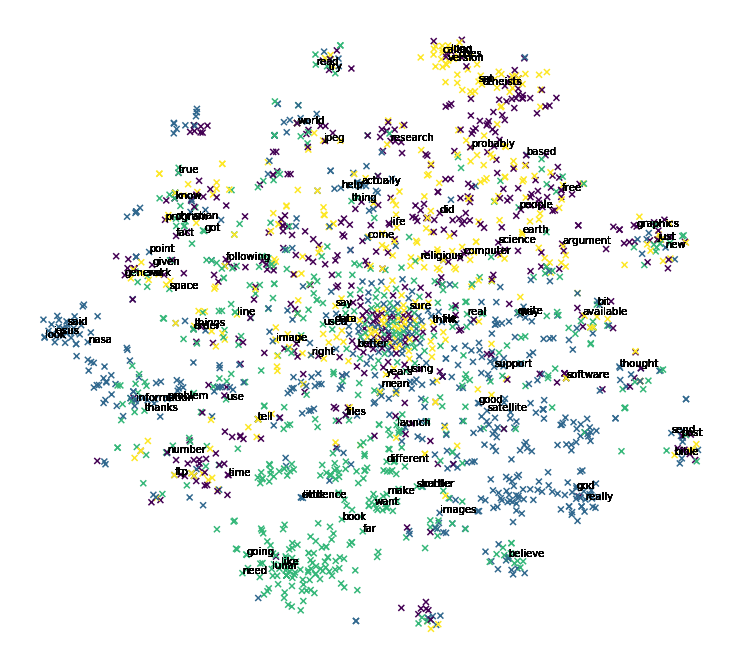

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x",c= newsgroups_train.target)

for i in range(vector.shape[0]):
    ind = np.argmax(vector[i],axis=1)
    ix  =  ind.ravel().tolist()[0][0]
    w =vectorizer_n.get_feature_names()[ix]
    ax.annotate(w, (X_embedded[word2int[w]][0],X_embedded[word2int[w]][1]))
plt.show()

### Example II Using LDA

In [42]:
n_topics= 20 # topics
n_iter = 500 # iterations

vectorizer = CountVectorizer(stop_words='english',strip_accents='ascii',min_df=5)
vector_lda  = vectorizer.fit_transform(news)

print(repr(vectors))

# LDA Model
import lda
lda_model = lda.LDA(n_iter=n_iter,n_topics=n_topics)
X_topics = lda_model.fit_transform(vector_lda)

INFO:lda:n_documents: 3387
INFO:lda:vocab_size: 5808
INFO:lda:n_words: 191828
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500


array([[ 0.3338116 , -0.9426398 ],
       [-0.9868508 , -0.16163354],
       [ 0.4048689 , -0.91437477],
       [-0.45112768,  0.89245945],
       [ 0.9577505 , -0.2876001 ],
       [ 0.74883425,  0.6627573 ],
       [-0.42090833, -0.9071031 ]], dtype=float32)


C:\ProgramData\Anaconda3\lib\site-packages\lda\utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -2400350
INFO:lda:<10> log likelihood: -1680129
INFO:lda:<20> log likelihood: -1615400
INFO:lda:<30> log likelihood: -1592883
INFO:lda:<40> log likelihood: -1582953
INFO:lda:<50> log likelihood: -1575614
INFO:lda:<60> log likelihood: -1570422
INFO:lda:<70> log likelihood: -1567327
INFO:lda:<80> log likelihood: -1564484
INFO:lda:<90> log likelihood: -1562891
INFO:lda:<100> log likelihood: -1560360
INFO:lda:<110> log likelihood: -1558281
INFO:lda:<120> log likelihood: -1558543
INFO:lda:<130> log likelihood: -1556440
INFO:lda:<140> log likelihood: -1556979
INFO:lda:<150> log likelihood: -1555599
INFO:lda:<160> log likelihood: -1554884
INFO:lda:<170> log likelihood: -15540

In [43]:
print(X_topics.shape,"\n")
print(X_topics[0])

(3387, 20) 

[0.0030303  0.03333333 0.0030303  0.0030303  0.30606061 0.3969697
 0.0030303  0.21515152 0.0030303  0.0030303  0.0030303  0.0030303
 0.0030303  0.0030303  0.0030303  0.0030303  0.0030303  0.0030303
 0.0030303  0.0030303 ]


In [44]:
threshold = 0.5
_idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
X_topics = X_topics[_idx]

In [45]:
# t-SNE
from sklearn.manifold import TSNE

# 20-D > 2-D
X_tsne = TSNE(n_components=2, verbose=1,init='pca',random_state=0,angle=0.99).fit_transform(X_topics)

print(X_tsne.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 943 samples in 0.001s...
[t-SNE] Computed neighbors for 943 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 943 / 943
[t-SNE] Mean sigma: 0.136410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.904808
[t-SNE] KL divergence after 1000 iterations: 0.344182
(943, 2)


* Visualizing groups and keywords

* Get words for each topics

In [56]:
topics_summaries = []

topics_word = lda_model.topic_word_ # all topics words

vocab = vectorizer.get_feature_names() # all the features names

n_top_words = 5 # number of keywords we show

for i, topic_dist in enumerate(topics_word):

    topics_words = np.array(vocab)[np.argsort(topic_dist)][:(n_top_words+1):-1]
    
    topics_summaries.append(" ".join(topics_words))

3387


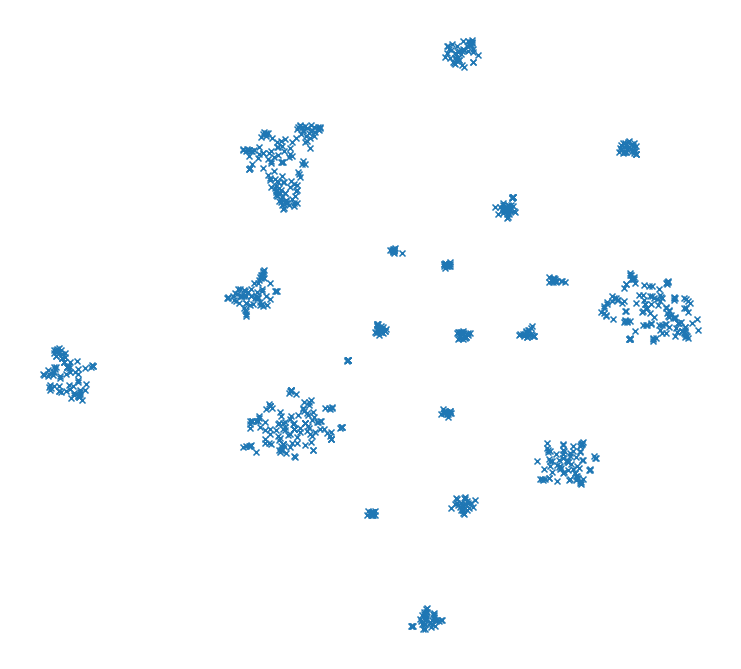

In [58]:
# Plotting high dimesion data into 2-D plot results for tsne
target = []
target.extend(newsgroups_train.target)
target.extend(newsgroups_test.target)

print(len(target))

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], marker="x")

* References
* http://projector.tensorflow.org/
* https://shuaiw.github.io/2016/12/22/topic-modeling-and-tsne-visualzation.html
* https://www.tensorflow.org/tutorials/representation/word2vec
* http://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb

### Example IV

In [60]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}


# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3),max_features=1000,min_df=5)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(newsgroups_train.data)

In [61]:
# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
# print labels
X = tf_idf_matrix.todense()

In [62]:
print(X.shape)

(2034, 1000)


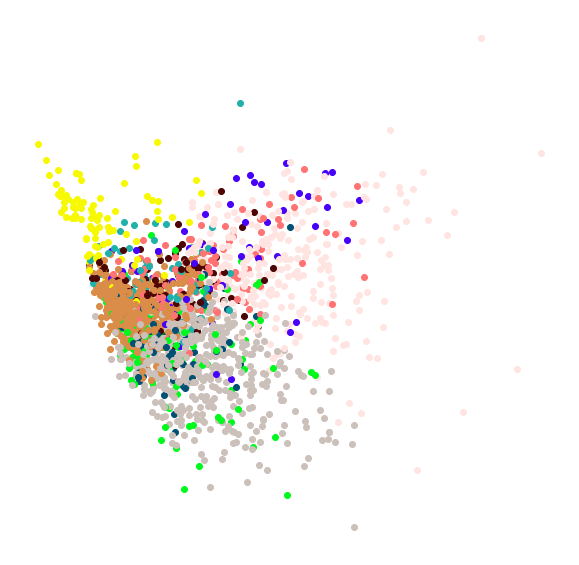

In [63]:
# PCA - plot
reduced_data = PCA(n_components= 2).fit_transform(X)

# plot reduced_data
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(frameon=False)

plt.setp(ax, xticks=(), yticks=())

for index, instance in enumerate(reduced_data):

    # print instance, index, labels[index]
    
    pca_comp_1, pca_comp_2 = reduced_data[index]
    
    color = labels_color_map[labels[index]]
    
    ax.scatter(pca_comp_1, pca_comp_2, c=color)

plt.show()

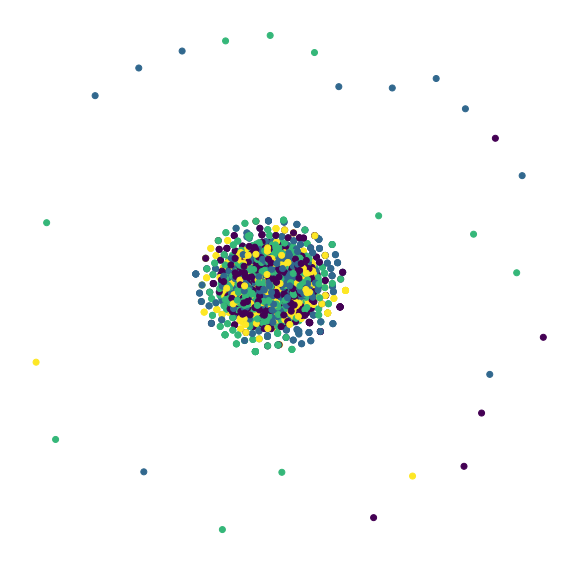

In [64]:
# t-SNE plot
embeddings = TSNE(n_components=2,init='pca')

Y = embeddings.fit_transform(X)

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(frameon=False)

plt.setp(ax, xticks=(), yticks=())

plt.scatter(Y[:, 0], Y[:, 1], c=newsgroups_train.target)

plt.show()

## Tensorflow Word2Vec Model

In [66]:
import numpy as np, pandas as pd
from six.moves import urllib, xrange
import tensorflow as tf

In [67]:
import collections,math, os,errno,random,zipfile

In [68]:
print(os.getcwd())
os.chdir(r'C:\Users\manish.singh04\Videos\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks')

C:\Users\manish.singh04\Videos\Tensorflow-Bootcamp-master\02-TensorFlow-Basics


In [69]:
data_dir = r'C:\Users\manish.singh04\Videos\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\word2vec\words'
data_url = "http://mattmahoney.net/dc/text8.zip"

In [70]:
def fetch_words_data(url=data_url, words_data=data_dir):
    
    # Make the Dir if it does not exist
    os.makedirs(words_data, exist_ok=True)
    
    # Path to zip file 
    zip_path = os.path.join(words_data, "words.zip")
    
    # If the zip file isn't there, download it from the data url
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(url, zip_path)
        
    # Now that the zip file is there, get the data from it
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    
    # Return a list of all the words in the data source.
    return data.decode("ascii").split()

In [71]:
words = fetch_words_data()

In [72]:
len(words)

17005207

In [73]:
for w in words[9000:9090]:
    print(w,end=' ')

feelings and the auditory system of a person without autism often cannot sense the fluctuations what seems to non autistic people like a high pitched sing song or flat robot like voice is common in autistic children some autistic children with relatively good language skills speak like little adults rather than communicating at their current age level which is one of the things that can lead to problems since non autistic people are often unfamiliar with the autistic body language and since autistic natural language may not tend towards speech 

In [74]:
from collections import Counter

In [75]:
my_list =['one','two','two']

In [76]:
Counter(my_list).most_common(2)

[('two', 2), ('one', 1)]

In [77]:
def create_counts(vocab_size=50000):

    # Begin adding vocab counts with Counter
    vocab = [] + Counter(words).most_common(vocab_size )
    
    # Turn into a numpy array
    vocab = np.array([word for word, _ in vocab])
    
    
    dictionary = {word: code for code, word in enumerate(vocab)}
    data = np.array([dictionary.get(word, 0) for word in words])
    return data,vocab

In [78]:
data, vocabulary = create_counts()

In [79]:
data.shape

(17005207,)

In [80]:
vocabulary.shape

(50000,)

In [81]:
words[100]

'interpretations'

In [82]:
data[100]

4186

In [83]:
def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [skip_window]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
    if data_index == len(data):
        buffer[:] = data[:span]
        data_index = span
    else:
        buffer.append(data[data_index])
        data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

In [84]:
# COSTANTS

In [85]:
batch_size = 128

embedding_size =150

skip_window = 1

num_skips = 2

valid_size = 16

In [86]:
valid_window = 100
valid_examples = np.random.choice(valid_window,valid_size,replace = False)

In [87]:
num_sampled = 64

learning_rate = 0.01

vocabulary_size = 50000

In [88]:
# RESET THE TF GRAPH

In [89]:
tf.reset_default_graph()

In [90]:
# CREATE PALCEHOLDERS FOR INPUTS

In [91]:
train_inputs = tf.placeholder(tf.int32,shape=[None])
train_labels = tf.placeholder(tf.int32,shape=[batch_size,1])

In [92]:
valid_datasets = tf.constant(valid_examples,dtype= tf.int32)

In [93]:
# eMBEDDING

In [94]:
init_embedding = tf.random_uniform([vocabulary_size,embedding_size],-1.0,1.0)

In [95]:
embeddings = tf.Variable(init_embedding)

In [96]:
embed = tf.nn.embedding_lookup(embeddings,train_inputs)

In [97]:
# NCE loss

In [98]:
nce_weights = tf.Variable(tf.truncated_normal([vocabulary_size,embedding_size],stddev=1.0/np.sqrt(embedding_size)))

In [99]:
nce_biases  = tf.Variable(tf.zeros([vocabulary_size]))

In [100]:
loss = tf.reduce_mean(
    tf.nn.nce_loss(
        nce_weights,
        nce_biases,
        train_labels,
        embed,
        num_sampled,
        vocabulary_size))

In [101]:
# optimizer

In [102]:
optimizer = tf.train.AdamOptimizer(learning_rate = 1.0)
trainer = optimizer.minimize(loss)

In [103]:
# Compute the cosine similarity between minibatch examples and all embeddings!
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings),axis=1,keepdims=True))

normalized_embeddings = embeddings / norm

valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,valid_datasets)

similarity = tf.matmul(valid_embeddings,normalized_embeddings,transpose_b=True)

In [ ]:
norm

In [105]:
data_index = 0

In [106]:
init = tf.global_variables_initializer()

In [107]:
Session = tf.Session()

In [108]:
num_steps = 5000

with tf.Session() as Session:
    
    Session.run(init)
    
    average_loss  = 0
    
    for step in range(num_steps):
        
        batch_inputs, batch_labels = generate_batch(batch_size,num_skips,skip_window)
        
        feed_dict = {train_inputs: batch_inputs,train_labels:batch_labels}

        _, loss_val = Session.run([trainer,loss],feed_dict=feed_dict)
        
        average_loss += loss_val

        if step % 1000 == 0:
            
            if step > 0:
                
                average_loss = average_loss/1000
                
            print("Average Loss at step",step,"is",average_loss)
            
            average_loss = 0

        final_embeddings = normalized_embeddings.eval()

Average Loss at step 0 is 276.788330078125
Average Loss at step 1000 is 10160.14154801941
Average Loss at step 2000 is 22548.476856506346
Average Loss at step 3000 is 26272.53696621704
Average Loss at step 4000 is 30896.50827633667


In [109]:
# tsne
final_embeddings.shape

(50000, 150)

In [110]:
print(np.array(final_embeddings))

[[-0.05597084  0.007134    0.03537896 ... -0.04734254  0.14222744
   0.03922963]
 [ 0.0265061   0.01253208 -0.06199547 ...  0.09490416  0.11029343
  -0.01668774]
 [-0.06550323  0.03996683 -0.07316499 ...  0.03465588  0.03095972
   0.08324224]
 ...
 [-0.05195164  0.06580905  0.01822029 ...  0.13574094  0.08257448
   0.02210234]
 [-0.09409066  0.07503723  0.08587202 ...  0.07570462 -0.06480998
  -0.10053973]
 [-0.05611551  0.13195954  0.1039136  ... -0.02404371  0.09213684
  -0.11968965]]


In [111]:
from sklearn.manifold import TSNE
# t-SNE plot
tsne = TSNE(n_components=2,init='pca',perplexity=30)

plot_only= 500

low_dim_embed = tsne.fit_transform(final_embeddings[:plot_only,:])

In [112]:
low_dim_embed.shape

(500, 2)

In [113]:
labels = [vocabulary[i] for i in range(plot_only)]

In [114]:
low_dim_embed

array([[ 2.55749655e+00,  1.63481617e+00],
       [-3.40606809e+00, -2.16905427e+00],
       [-3.78701377e+00,  2.55664301e+00],
       [-4.91877270e+00, -6.38892174e-01],
       [-5.85030413e+00,  3.66947603e+00],
       [ 3.43127936e-01,  1.10755658e+00],
       [-3.03650331e+00,  1.56300306e+00],
       [ 4.03989792e+00,  2.08694124e+00],
       [-3.16227984e+00,  1.29179800e+00],
       [-2.69705200e+00, -4.46786261e+00],
       [ 1.45001507e+00, -4.26857758e+00],
       [ 6.58035994e+00, -4.39934587e+00],
       [-7.84072280e-01, -8.73100376e+00],
       [-2.46296358e+00,  3.34048700e+00],
       [-2.68472433e+00, -1.32079995e+00],
       [-3.85477805e+00, -3.95207500e+00],
       [ 5.28684282e+00, -6.37358332e+00],
       [ 3.69051784e-01, -5.99875987e-01],
       [-4.64416695e+00, -3.63404965e+00],
       [-2.74056673e+00, -6.21488094e-01],
       [ 4.89101321e-01, -4.33009982e-01],
       [ 1.54438043e+00,  2.69871378e+00],
       [-5.79415846e+00, -4.04599047e+00],
       [-1.

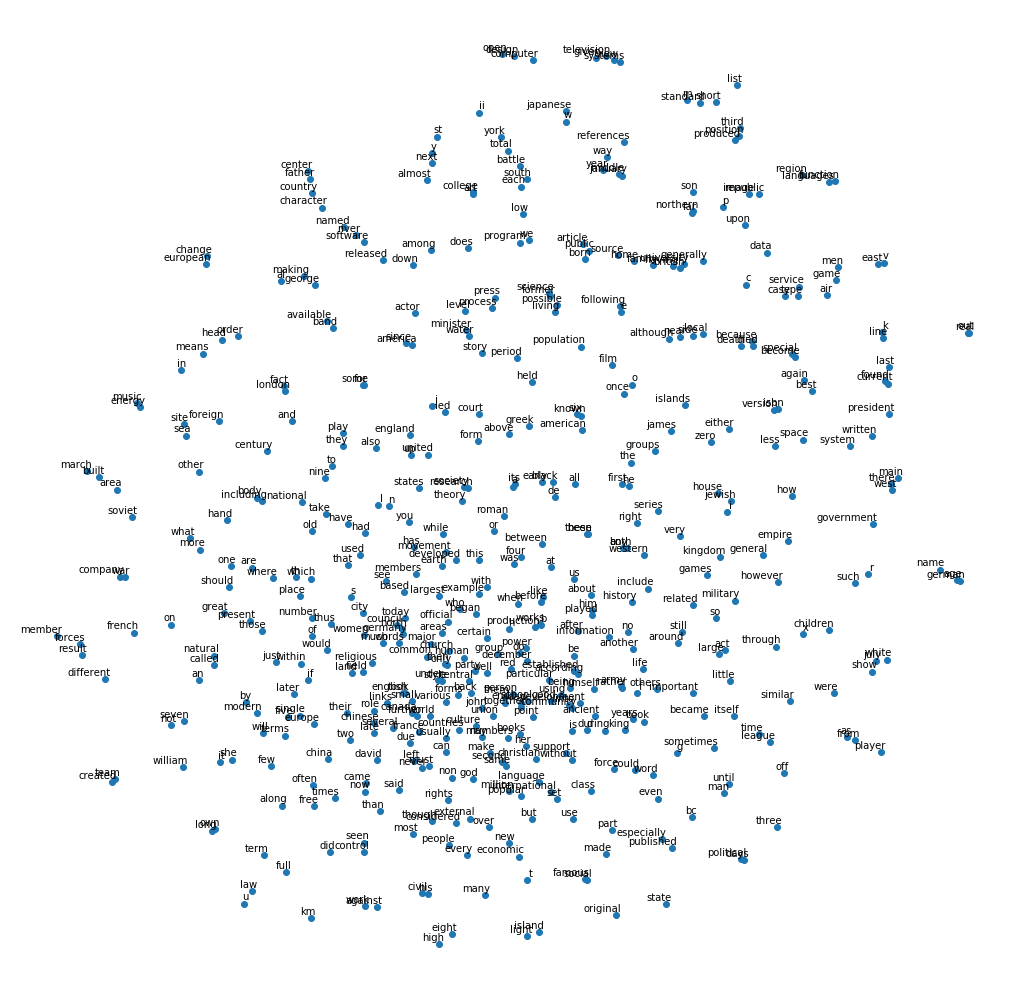

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(18, 18))

ax = plt.axes(frameon=False)

plt.setp(ax, xticks=(), yticks=())

plt.scatter(low_dim_embed[:, 0], low_dim_embed[:, 1])

for i, label in enumerate(labels):
    plt.annotate(label,xy=(low_dim_embed[i,:]),xytext=(5,2),textcoords = 'offset points',ha='right',va='bottom')
plt.show()

# Gensim Guide

* References: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Tensorboard_visualizations.ipynb 

In [1]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [2]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [30]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]

In [32]:
documents

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]),
 TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]),
 TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]),
 TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]),
 TaggedDocument(words=['user', 'response', 'time'], tags=[4]),
 TaggedDocument(words=['trees'], tags=[5]),
 TaggedDocument(words=['graph', 'trees'], tags=[6]),
 TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]),
 TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])]

In [33]:
model = Doc2Vec(documents,vector_size = 5, window=2,min_count=1,workers=4)

C:\Users\manish.singh04\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [34]:
model.infer_vector(['system','response'])

array([ 0.00378137,  0.00962957,  0.00790751,  0.01735609, -0.09757256],
      dtype=float32)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [38]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)


In [39]:
vect = CountVectorizer(stop_words='english')

In [40]:
vect.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [41]:
x = vect.transform(documents)

In [42]:
x.toarray()

array([[1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 1, 1, 0, 2]], dtype=int64)

In [43]:
vect.get_feature_names()

['blue', 'bright', 'shining', 'sky', 'sun']

In [44]:
document= ("the water is blue","The sun is in right")

In [45]:
xy = vect.transform(document)

In [46]:
xy.toarray()

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

In [47]:
x[0:1].toarray()

array([[1, 0, 0, 1, 0]], dtype=int64)

In [48]:
vect.get_feature_names()

['blue', 'bright', 'shining', 'sky', 'sun']

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
cosine_similarity(x[0:1],x)

array([[1.        , 0.        , 0.40824829, 0.        ]])